# Building a Product Recommendation System with Collaborative Filtering

We will go deeper into building a product recommendation system that we can better target customers with, using product recommendations that are tailored to individual customers. Studies have shown that customized product recommendations improve conversion rates and customer retention rates. 

A product recommendation system is a system whose objective is to predict and compile a list of items that a customer is likely to buy. Referral systems have gained much popularity in recent years and have been developed and implemented for various commercial use cases

For example, 
* The media service provider, Netflix, uses referral systems to recommend movies or television programs for individual users who are likely to watch
* The e-commerce company Amazon uses recommendation systems to predict and display a list of products that the customer is likely to buy
* The music streaming service, Pandora, uses music recommendation systems for its listeners. 
* The use of a referral system does not stop here. It can also be used to recommend users related articles, news or books

With the potential to be used in a variety of areas, referral systems play a critical role in many businesses, especially e-commerce and media businesses, as they directly impact sales revenue and user engagement

Generally, there are two ways to develop a list of recommendations:

### 1. Collaborative filtering

The collaborative filtering method is based on users' previous behaviors, such as the pages they saw, the products they bought, or the ratings they gave to different items. The collaborative filtering method uses this data to find similarities between users or articles, and recommends the most similar articles or content to users. 

The basic assumption behind the collaborative filtering method is that those who have seen or bought similar content or products in the past are likely to see or buy similar types of content or products in the future. 

Thus, based on this assumption, if one person bought items `A`, `B`, and `C` and another person bought items `A`, `B`, and `D` in the past, it is likely that the first person will buy item `D` and the other person will buy item `C`, since they share many similarities with each other


### 2. Content-based filtering

On the other hand, content-based filtering produces a list of recommendations based on the characteristics of an article or user. It usually examines the keywords that describe the characteristics of an article. The basic assumption of the content-based filtering method is that users are likely to see or buy items similar to those they have bought or seen in the past

For example, if a user has listened to some songs in the past, the content-based filtering method will recommend similar song types that share similar characteristics to those the user has already heard

## Building a Product Recommendation System with Collaborative Filtering

As mentioned, a collaborative filtering algorithm is used to recommend products based on user behavior history and similarities between them. The first step in implementing a collaborative filtering algorithm for a product recommendation system is to build a user-to-item matrix

A user-to-item matrix comprises individual users in the rows and individual elements in the columns. It will be easier to explain with an example. Take a look at the following matrix

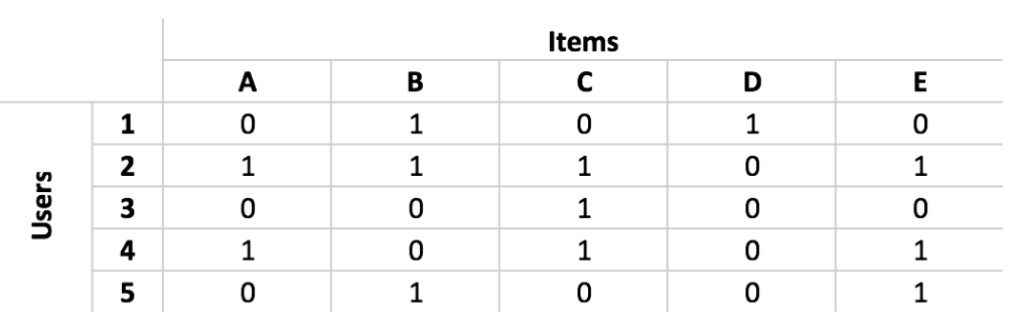

The rows of this matrix represent each user and the columns represent each element. The values in each cell represent whether the given user bought the given item or not. For example, user `1` has purchased items `B` and `D` and user `2` has purchased items `A`, `B`, `C` and `E`

To build a product recommendation system based on collaborative filtering, we need to first build this type of user-to-item matrix. With this user-to-item matrix, the next step in building a product recommendation system based on collaborative filtering is to calculate the similarities between users

To measure similarities, the similarity of cosines is often used. The equation for computing cosine similarity between two users looks like this

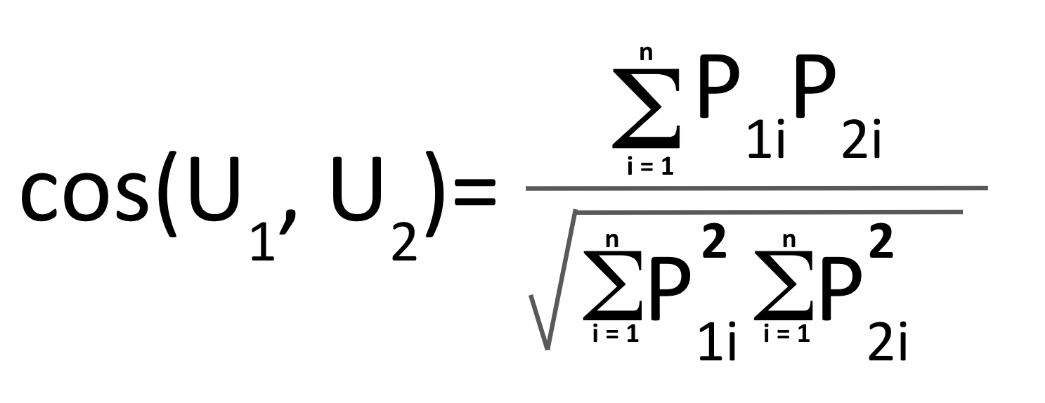

In this equation, `U1` and `U2` represent user `1` and user `2`. `P1i` and `P2i` represent each product, `i`, that user `1` and user `2` have purchased. If you use this equation, you will get `0.353553` as the cosine similarity between users `1` and `2` in the example above and `0.866025` as the cosine similarity between users `2` and `4`

As you can imagine, the greater the similarity of the cosine, the more similar the two users. Thus, in our example, users `2` and `4` are more similar to each other than users `1` and `2`. Finally, when using a collaborative filtering algorithm for product recommendations, there are two approaches that can be taken: a user-based approach and an item-based approach

As the names suggest, the user-based approach to collaborative filtering uses the similarities between users. On the other hand, the article-based collaborative filtering approach uses the similarities between the items. This means that when we calculate the similarities between the two users in the collaborative filtering of the user-based approach, we need to build and use a user-to-article matrix, as we have discussed above

However, for the item-based approach, we need to calculate the similarities between the two elements, and this means that we need to build and use an item-to-user matrix, which we can obtain by simply transposing the user-to-item matrix. 

Let's discuss how to build a product recommendation system using Python. We will begin this section by analyzing some e-commerce business data and then discuss the two approaches to building a product recommendation system with collaborative filtering

For this Notebook you'll find the dataset once <a href="https://www.narrativetext.co/pricing" target="_blank">you subscribe to our service here</a>

In [3]:
import pandas as pd

df = pd.read_excel(io='datasets/Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(541909, 8)

There are records with negative values in the `Quantity` column, representing cancelled orders. Let's ignore and delete these records. We can filter all these records in our DataFrame with the following code:

In [5]:
df = df.loc[df['Quantity'] > 0]

### Data Preparation

Before we dive into building a product recommendation engine using a collaborative filtering algorithm, we need to do the following couple of things:

* Manage the `NaN` values in the dataset
* Build a user-to-item matrix

First, we need to manage the `NaN` values in our dataset, especially those `NaN` in the `CustomerID` field. Without correct values in the `CustomerID` field, we cannot build a proper recommendation system, since the collaborative filtering algorithm depends on historical item purchase data for individual customers.

Secondly, we need to build a user-to-item matrix before we can implement the collaborative filtering algorithm for product recommendation. The user-to-item matrix is simply tabular data, where each column represents each product or item, each row represents a customer, and the value in each cell represents whether or not the given customer bought the given product.

**Managing NaNs in the `CustomerID` field**

If you look closely at the data, you will notice that there are some records without customer identification. Since we have to build a customer item matrix in which each row is specific to each customer, we cannot include those records without `CustomerID` in our data. Let's first see how many records do not have a customer ID.

Let's take a look at the following code:

In [6]:
df['CustomerID'].isna().sum()

133361

As you can see in this output, there are `133,361` records without customer identification. And some of the data that is missing customer identification looks like this:

In [7]:
df.loc[df['CustomerID'].isna()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


Now that we know that there are records with missing customer identification entries, we have to exclude them from further analysis. One way to remove them from our DataFrame is to use the `dropna` function, as in the following:

In [8]:
df = df.dropna(subset=['CustomerID'])

In [9]:
df.shape

(397924, 8)

### Building a matrix of items for the client

The data we now have represents individual items purchased by customers. However, to build a product recommendation system with a collaborative filtering algorithm, we need to have data where each record contains information about which item each customer has purchased.

We are going to transform the data into a user-to-item matrix, where each row represents one customer and the columns correspond to different products.

Let's take a look at the following code:

In [10]:
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [11]:
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see from this, we now have a matrix where each row represents the total quantities purchased for each product for each customer.

Now, let's code `0-1` this data, so that a value of `1` means that the given product was bought by the given customer, and a value of `0` means that the given product was never bought by the given customer. Take a look at the following code:

In [12]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [13]:
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see in this code, we are using the "`applymap`" function, which applies a given function to each element of a DataFrame.

The Lambda function we are using in this code simply codes all the elements whose values are greater than `0` with `1`, and the rest with `0`.

Now we have an array of client elements that we can use for the collaborative filtering algorithm. Let's now move on to the construction of product recommendation engines.

## Collaborative filtering

We will explore two approaches to building our user-based and article-based recommender. In the user-based approach, we calculate the similarities between users based on their item purchase history. In the item-based approach, on the other hand, we calculate the similarities between items based on which items are often purchased along with which other items.

To measure the similarity between users or between articles, we will use the `cosine_similarity` method in the `scikit-learn` package. You can import this function using the following code:

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

This `cosine_similarity` function in the sklearn package calculates the cosine similarities in pairs in the given data.

### User-based collaboration filters and recommendations

To build a user-based collaborative filtering algorithm, we need to calculate the cosine similarities between users. Let's take a look at the following code:

In [15]:
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)

In [16]:
user_user_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4335,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4336,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4337,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


As you can see in this code, we are using the `cosine_similarity` function of the `metrics.pairwise` module from the sklearn package. This function calculates the cosine similarities in pairs between the samples and produces the results as an array type.

Then, we create a pandasDataFrame with this output array and store it in a variable called `user_user_sim_matrix`, which means user-user similarity array.

As you can see, the index and the names of the columns are not easy to understand. Since each column and row in the index represents individual clients, we're going to rename the index and columns using the following code:

In [17]:
user_user_sim_matrix.columns = customer_item_matrix.index

In [18]:
user_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4335,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4336,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4337,0.0,0.109364,0.170905,0.137124,0.044866,0.080278,0.0,0.113354,0.034204,0.093170,...,0.0,0.037184,0.016480,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [19]:
user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')

In [20]:
user_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


Let's take a closer look at this matrix of similarities between users. As you can imagine, the cosine similarity between a client and itself is 1, and this is what we can observe from this similarity matrix. The diagonal elements of this user similarity matrix have values of `1`.

The rest represents the cosine similarity between two clients. For example, the measure of cosine similarity between clients `12347` and `12348` is `0.063022`. On the other hand, the cosine similarity between clients `12347` and `12349` is 0.046130. This suggests that client `12348` is more similar to client `12347` than client `12349` is to client `12347`, based on the products they purchased. In this way, we can easily tell which customers are similar to others, and which customers have purchased similar items from others.

These cosine pair similarity measures are what we will use for product recommendations. Let's work on choosing a customer as an example. First we will classify the customers most similar to the customer with ID `12350`, using the following code:

In [21]:
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
             ...   
15953.0    0.000000
15952.0    0.000000
15951.0    0.000000
15950.0    0.000000
12346.0    0.000000
Name: 12350.0, Length: 4339, dtype: float64

These are the 10 most similar clients to the `12350` client. Let's choose client `17935` and discuss how we can recommend products using these results.

The strategy is as follows.

* First, we need to identify the items that `12350` and `17935` customers have already purchased.
* Then, let's find the products that target client `17935` has not purchased, but client `12350` has.
* Since these two customers have bought similar items in the past, we will assume that target customer `17935` has a high probability of buying the items he or she has not bought, but customer `12350` has.
* Finally, we are going to use this list of items and recommend them to target customer `17935`.

Let's first see how we can retrieve the items that the `12350` customer has purchased in the past. The code looks like this:

In [22]:
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[
    customer_item_matrix.loc[12350.0].to_numpy().nonzero()
].index)

In [23]:
items_bought_by_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

As you can see in this code, we are using the `nonzero(`) function. This function returns the integer indexes of the non-zero elements. Using this function in the customer_item_matrix for the given `12350` client, we can get the list of elements that the `12350` client has purchased. We can apply the same code for the target client `17935`, as in the following:

In [24]:
items_bought_by_B = set(customer_item_matrix.loc[17935.0].iloc[
    customer_item_matrix.loc[17935.0].to_numpy().nonzero()
].index)

In [25]:
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

We now have two sets of items that customers `12350` and `17935` have purchased. Using a simple set operation, we can find the items that customer `12350` has purchased, but customer `17935` has not. The code is like the one below:

In [26]:
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B

In [27]:
items_to_recommend_to_B

{20615,
 20652,
 21171,
 21832,
 21864,
 21908,
 21915,
 22348,
 22412,
 22620,
 '79066K',
 '79191C',
 '84086C'}

To obtain the descriptions of these items, you can use the following code:

In [29]:
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


Using user-based collaborative filtering, we have discussed how we can make specific product recommendations for individual customers. You can customize and include in your marketing messages these products that each target customer is likely to buy, which can generate more conversions from your customers.

As discussed so far, using a collaborative user-based filtering algorithm, you can easily make product recommendations for target customers.

However, there is one major disadvantage to using user-based collaborative filtering. As we have seen in this exercise, recommendations are based on the individual customer's purchase history. For new customers, we will not have enough data to compare these new customers with others. To handle this problem, we can use item-based collaborative filtering, which we will discuss now.

### Collaborative filtering based on articles and recommendations

Item-based collaborative filtering is similar to the user-based approach, except that it uses measures of similarity between items, rather than between users or customers.

Before, we had to calculate cosine similarities between users, but now, we are going to calculate cosine similarities between items. Take a look at the following code:

In [30]:
item_item_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix.T)
)

In [31]:
item_item_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.000000,0.0,0.000000,0.0,0.000000,0.029361,0.0,0.066915,0.000000,0.078217
1,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016182,0.000000,0.000000
2,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.010993
3,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.070669
4,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.000000,0.0,0.000000,0.0,0.000000,0.036955,0.0,0.070185,0.049752,0.021877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,0.029361,0.000000,0.000000,0.000000,0.036955,0.019360,0.055989,0.000000,0.000000,0.039996,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.026196,0.000000,0.020413
3661,0.000000,0.000000,0.000000,0.000000,0.000000,0.104257,0.150756,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
3662,0.066915,0.016182,0.070535,0.070535,0.070185,0.066184,0.106335,0.063801,0.059013,0.086089,...,0.049875,0.0,0.040723,0.0,0.089220,0.026196,0.0,1.000000,0.000000,0.077539
3663,0.000000,0.000000,0.000000,0.000000,0.049752,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000


If you compare this code with the previous one, in which we calculate an array of similarities between users, the only difference is that here we are transposing the `customer_item_matrix`, so that the indexes in the rows represent individual items and the columns represent the customers.

We continue to use the `cosine_similarity` function from the `metrics.pairwise` module in the `sklearn` package. To correctly name the indexes and columns with the product codes, you can use the following code:

In [32]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')

In [33]:
item_item_sim_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.000000,0.0,0.000000,0.0,0.000000,0.029361,0.0,0.066915,0.000000,0.078217
10080,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.016182,0.000000,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.010993
10125,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.070535,0.000000,0.070669
10133,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.000000,0.0,0.000000,0.0,0.000000,0.036955,0.0,0.070185,0.049752,0.021877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.029361,0.000000,0.000000,0.000000,0.036955,0.019360,0.055989,0.000000,0.000000,0.039996,...,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.026196,0.000000,0.020413
DOT,0.000000,0.000000,0.000000,0.000000,0.000000,0.104257,0.150756,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
M,0.066915,0.016182,0.070535,0.070535,0.070185,0.066184,0.106335,0.063801,0.059013,0.086089,...,0.049875,0.0,0.040723,0.0,0.089220,0.026196,0.0,1.000000,0.000000,0.077539


As before, diagonal elements have values of `1`. This is because the similarity between an element and itself is 1, which means that the two are identical. The rest of the elements contain the values for measuring the similarity between the elements based on the calculation of cosine similarity.

For example, if you look at the similarity matrix between elements above, the cosine similarity between the element with StockCode `10002` and the element with StockCode `10120` is `0.094868`. On the other hand, the cosine similarity between item `10002` and item `10125` is `0.090351`. This suggests that the item with StockCode `10120` is more similar to the item with StockCode `10002` than the item with StockCode `10125` to the item with StockCode `10002`.

The strategy for making the product recommendation using this item similarity matrix is similar to the one we did using the user-based approach.

* First, for the product given that the target customer bought, we are going to find the most similar items from the item-to-item similarity matrix that we just built.
* Then, we're going to recommend these similar items to the customer because those similar items were bought by other customers who have purchased the product that the target customer initially bought.

Let's work with an example.

Let's suppose that a new customer has just bought a product with StockCode `23166`, and we want to include in our marketing emails some products that this customer is most likely to buy. The first thing we have to do is to find the items most similar to the one with StockCode `23166`. You can use the following code to get the `10` items most similar to the item with StockCode `23166`:

In [34]:
top_10_similar_items = list(
   item_item_sim_matrix\
        .loc[23166]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)

In [35]:
top_10_similar_items

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

We can obtain descriptions of these similar items using the following code:

In [36]:
df.loc[
    df['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22666,RECIPE BOX PANTRY YELLOW DESIGN
23243,SET OF TEA COFFEE SUGAR TINS PANTRY


The first item here is the one that the target customer has just bought and the other nine are the items that are frequently bought by others who have bought the first item.

As you can see, those who have purchased ceramic storage jars often buy gelatin molds, spice cans, and cake tins.

With this data, you can include these items in your marketing messages for this target customer as additional product recommendations. Personalizing marketing messages with specific product recommendations often results in higher customer conversion rates. Using an article-based collaborative filtering algorithm, you can now easily make product recommendations for both new and existing customers.